In [ ]:
import skimage
import os
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import random

In [ ]:
demo = "./dataset/Training/00000/01153_00000.ppm"
imgFile = skimage.io.imread(pathImg)
imgFile70 = skimage.transform.resize(imgFile, (70, 70))
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

axes[0].imshow(imgFile)
axes[1].imshow(imgFile70)
plt.tight_layout()
plt.show()

NameError: name 'pathImg' is not defined

: 

In [63]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            pathImg = f
            imgFile = skimage.io.imread(pathImg)
            imgFile70 = skimage.transform.resize(imgFile, (70, 70))
            images.append(imgFile70)
            labels.append(int(d))
    labels = np.array(labels)
    images = np.array(images)
    return images, labels

In [64]:
train_data_directory = "dataset/Training"
test_data_directory = "dataset/Testing"
# load trainning data

training_images, labels = load_data(train_data_directory)
train_x = np.reshape(training_images, (4575, 14700))
train_y = labels

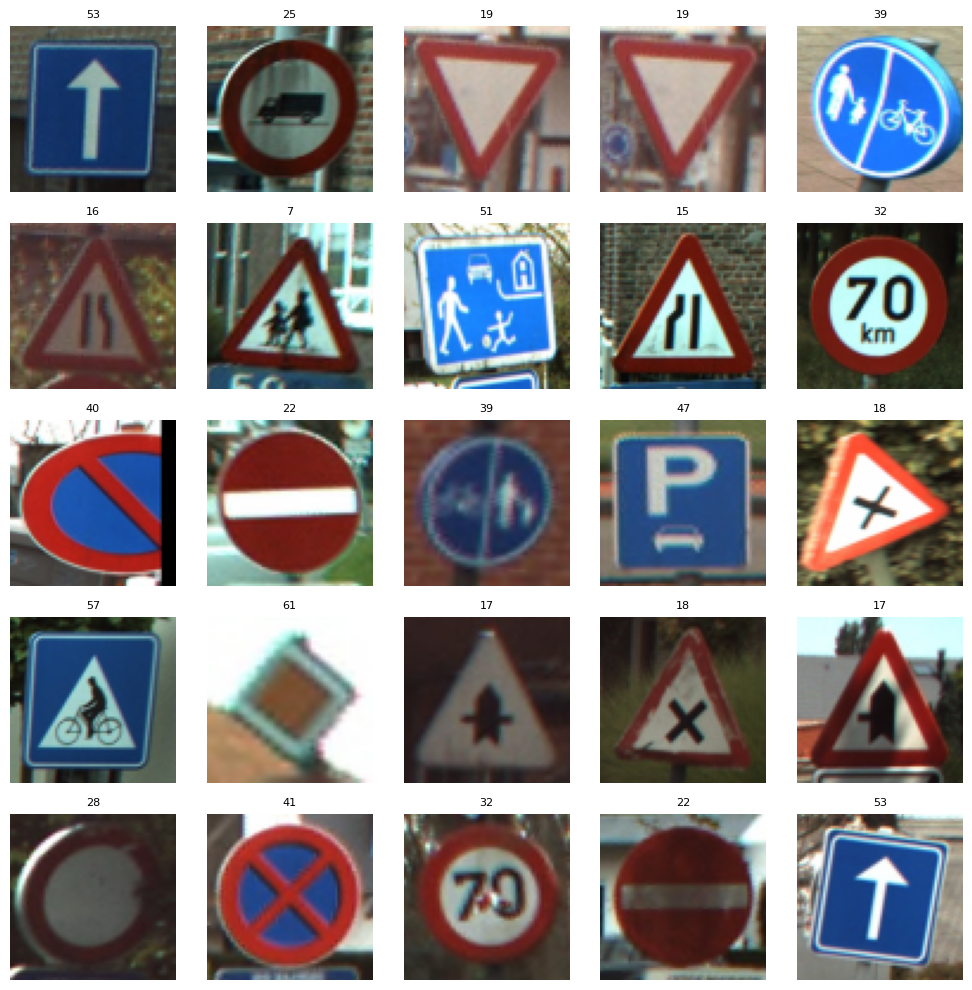

In [66]:
def display_random_images(images, labels, grid_size=(5, 5)):
    # Randomly select 25 indices
    selected_indices = random.sample(range(len(images)), grid_size[0] * grid_size[1])
    
    # Create a figure
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    
    for ax, idx in zip(axes.ravel(), selected_indices):
        ax.imshow(images[idx], cmap="gray" if len(images[idx].shape) == 2 else None)
        ax.set_title(labels[idx], fontsize=8)  # Set label as title
        ax.axis("off")  # Hide axes
    
    plt.tight_layout()
    plt.show()

display_random_images(training_images, train_y)

In [ ]:
model = Sequential([
    Dense(units=4900, activation="relu", input_shape=(14700,)),
    Dense(units=100, activation="relu"),
    Dense(units=100, activation="relu"),
    Dense(units=62, activation="linear")
])


model.compile(    
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

model.fit(train_x,train_y, batch_size=32,epochs=20,verbose=2)

Epoch 1/30
143/143 - 8s - 54ms/step - accuracy: 0.3790 - loss: 2.8042
Epoch 2/30
143/143 - 0s - 3ms/step - accuracy: 0.6520 - loss: 1.3812
Epoch 3/30
143/143 - 0s - 3ms/step - accuracy: 0.7475 - loss: 0.9532
Epoch 4/30
143/143 - 0s - 3ms/step - accuracy: 0.8094 - loss: 0.6929
Epoch 5/30
143/143 - 0s - 2ms/step - accuracy: 0.8321 - loss: 0.6025
Epoch 6/30
143/143 - 0s - 2ms/step - accuracy: 0.8763 - loss: 0.4501
Epoch 7/30
143/143 - 0s - 2ms/step - accuracy: 0.8953 - loss: 0.3752
Epoch 8/30
143/143 - 0s - 2ms/step - accuracy: 0.8955 - loss: 0.3487
Epoch 9/30
143/143 - 0s - 2ms/step - accuracy: 0.9209 - loss: 0.2692
Epoch 10/30
143/143 - 0s - 2ms/step - accuracy: 0.9336 - loss: 0.2256
Epoch 11/30
143/143 - 0s - 3ms/step - accuracy: 0.9438 - loss: 0.1950
Epoch 12/30
143/143 - 0s - 3ms/step - accuracy: 0.9152 - loss: 0.2840
Epoch 13/30
143/143 - 0s - 2ms/step - accuracy: 0.9578 - loss: 0.1542
Epoch 14/30
143/143 - 0s - 2ms/step - accuracy: 0.9336 - loss: 0.2197
Epoch 15/30
143/143 - 0s - 2

In [58]:
# load test data
test_images, labels = load_data(test_data_directory)
test_x = np.reshape(test_images, (2520, 14700))
test_y = labels

In [60]:
model.evaluate(test_x, test_y, batch_size=32)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9330 - loss: 0.3730


[0.48237401247024536, 0.9059523940086365]